## Jeffrey Chen APHY 470 PSET 8
## Problem 1
### (a)

In [119]:
import math
import matplotlib.pyplot as plt
import numpy
import random
from scipy.optimize import curve_fit

In [120]:
def add_vec(a, b):
    return [a[i] + b[i] for i in range(len(a))]

def norm_squared(vec):
    ret = 0
    for comp in vec:
        ret += (comp ** 2)
    return ret

def saw(N):
    '''
    Use simple sampling until we obtain a successful self-avoiding walk
    '''
    pos = [0, 0, 0]

    # We utilize a hashmap to check in O(1) time whether or not a site has already been visited
    visited = {}
    visited[tuple(pos)] = True
    i = 0

    while i < N:
        delta = [0, 0, 0]
        delta[random.randint(0, 2)] = random.choice([-1, 1])

        pos = add_vec(pos, delta)
        # The new position has already been visited so we disband this random walk
        if visited.get(tuple(pos)) is not None:
            # Reset
            visited = {}
            i = -1
            pos = [0, 0, 0]
        visited[tuple(pos)] = True
        i += 1
    return norm_squared(pos)



### (b)

In [121]:
N = 20

print("{:<8} {:<24} {:<24} {:<24}".format("Samples", "Estimated Mean", "St Dev of Estimated Mean", "Percent Uncertainty"))

for num_samples in numpy.linspace(20, 200, 10):
    distances_squared = []
    for _ in range(int(num_samples)):
        distances_squared.append(saw(N))
    
    est_mean = sum(distances_squared) / num_samples
    est_var = 0
    for d in distances_squared:
        est_var += ((d - est_mean) ** 2)
    est_var /= (num_samples - 1)
    est_sigma = math.sqrt(est_var)
    sigma = est_sigma / math.sqrt(num_samples)
    relative_uncertainty = sigma / est_mean * 100

    print("{:<8} {:<24.6f} {:<24.6f} {:<24.2f}".format(num_samples, est_mean, sigma, relative_uncertainty))


Samples  Estimated Mean           St Dev of Estimated Mean Percent Uncertainty     
20.0     26.300000                3.328584                 12.66                   
40.0     41.150000                4.278682                 10.40                   
60.0     38.800000                3.473613                 8.95                    
80.0     34.950000                2.432370                 6.96                    
100.0    40.360000                2.691157                 6.67                    
120.0    40.100000                2.202475                 5.49                    
140.0    37.157143                1.884874                 5.07                    
160.0    42.250000                2.189796                 5.18                    
180.0    37.166667                1.653383                 4.45                    
200.0    39.350000                1.920633                 4.88                    


I will chose $N_{samp} = 200$ to obtain roughly 5% relative uncertainty for $\langle |R|^2 \rangle$

### (c)

In [122]:
num_samples = 200
N_vals = [40, 30, 20, 10, 5]

print("{:<8} {:<24} {:<24} {:<24}".format("N", "Estimated Mean", "St Dev of Estimated Mean", "Percent Uncertainty"))
means = []
sigmas = []
for n in N_vals:
    distances_squared = [saw(n) for _ in range(num_samples)]

    est_mean = sum(distances_squared) / num_samples
    means.append(est_mean)
    est_var = 0
    for d in distances_squared:
        est_var += ((d - est_mean) ** 2)
    est_var /= (num_samples - 1)
    est_sigma = math.sqrt(est_var)
    sigma = est_sigma / math.sqrt(num_samples)
    sigmas.append(sigma)
    relative_uncertainty = sigma / est_mean * 100

    print("{:<8} {:<24.6f} {:<24.6f} {:<24.2f}".format(n, est_mean, sigma, relative_uncertainty))

N        Estimated Mean           St Dev of Estimated Mean Percent Uncertainty     
40       88.290000                4.105723                 4.65                    
30       60.970000                3.015270                 4.95                    
20       38.030000                1.739316                 4.57                    
10       17.570000                0.721511                 4.11                    
5        7.230000                 0.297452                 4.11                    


v = 0.5941985489862434


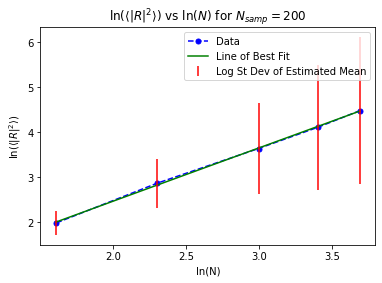

In [123]:
log_means = list(map(math.log, means))
log_N_vals = list(map(math.log, N_vals))
log_sigmas = list(map(lambda x: math.log(x + 1), sigmas))

def linear_fit(x, m, b):
    return m * x + b

opt, _ = curve_fit(linear_fit, log_N_vals, log_means)
m, b = opt
cts_x = numpy.linspace(math.log(5), math.log(40), 100)
fit_y = [linear_fit(x, m, b) for x in cts_x]

plt.plot(log_N_vals, log_means, marker = ".", ls = "--", ms = 10, color = "blue", label = "Data")
plt.plot(cts_x, fit_y, color = "green", label = "Line of Best Fit")
plt.errorbar(log_N_vals, log_means, yerr = log_sigmas, fmt = "none", color = "red", label = "Log St Dev of Estimated Mean")
plt.xlabel("ln(N)")
plt.ylabel(r"$\ln(\langle |R|^2 \rangle)$")
plt.title(r"$\ln(\langle |R|^2 \rangle)$ vs $\ln(N)$ for $N_{samp} = 200$")
plt.legend()
print(f"v = {m/2}")

My linear regression returns $v \approx 0.594$ which is quite close compared to the literature value of $0.589$ as desired.

### (d)

In [124]:
def unconstrained_walk(N):
    pos = [0, 0, 0]
    i = 0
    while i < N:
        delta = [0, 0, 0]
        delta[random.randint(0, 2)] = random.choice([-1, 1])
        pos = add_vec(pos, delta)
        i += 1
    return norm_squared(pos)

num_trials = 200
v_list = []

for trial in range(num_trials):
    means = []
    sigmas = []
    for n in N_vals:
        distances_squared = [unconstrained_walk(n) for _ in range(num_samples)]
        est_mean = sum(distances_squared) / num_samples
        means.append(est_mean)
    
    log_means = list(map(math.log, means))
    opt, _ = curve_fit(linear_fit, log_N_vals, log_means)
    m, b = opt
    v = m / 2
    v_list.append(v)

In [125]:
v_bar = sum(v_list) / num_trials
est_var = 0
for v in v_list:
    est_var += ((v - v_bar) ** 2)
est_var /= (num_trials - 1)
est_sigma = math.sqrt(est_var)
sigma = est_sigma / math.sqrt(num_trials)
print(f"Standard Deviation of Estimated v: {sigma}")

Standard Deviation of Estimated v: 0.0012093914410964632


I obtain an error bar for $v$ by following the problem set's third suggestion. I utilize an unconstrained walk to estimate how much $v$ fluctuates since it runs a lot faster than a self-avoiding walk. I run 200 trials where I calculate $v$ by running a linear regression to obtain a value of $v$ after obtaining 200 samples of the unconstrained walk for each value of N (5, 10, 20, 30, 40) we tried in part (c). I calculate that the standard deviation of the estimated $v$ from 200 trials is $\approx 0.0012$ which is quite good. I do not physically plot this error because it is a very small number so it would difficult to see on the plot but this means that our linear regression is quite accurate in estimating $v$.